In [3]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
import pandas as pd
import time

In [5]:
#data 1 --> from 2018:2020
#data 2 --> 2020:present

current_date_epoch = int(time.time())

data_1 = cg.get_coin_market_chart_range_by_id(id='bitcoin',vs_currency='usd',from_timestamp='1514782800',to_timestamp='1601092800')
data_2= cg.get_coin_market_chart_range_by_id(id='bitcoin',vs_currency='usd',from_timestamp='1601179200',to_timestamp=f"{current_date_epoch}")

In [6]:
# gather date and price data and append to lists + create dataframe

date = []
price = []

for i in range(len(data_1['prices'])):
    date.append(data_1['prices'][i][0])
    price.append(data_1['prices'][i][1])


for i in range(len(data_2['prices'])):
    date.append(data_2['prices'][i][0])
    price.append(data_2['prices'][i][1])

df_date = pd.DataFrame(date, columns= ['date'])
df_price = pd.DataFrame(price, columns= ['price'])

df = pd.concat([df_date,df_price], axis =1)

df.head()

,date,price
0,1514851200000,15321.932852
1,1514937600000,15583.885538
2,1515024000000,15976.365194
3,1515110400000,18336.922980
4,1515196800000,18343.662493


In [7]:
# clean dataframe up and change date to human readable format

df['date'] = pd.to_datetime(df['date'], unit = 'ms')
df['date'] = df['date'].dt.date
df['pct_chg'] = df['price'].pct_change()
df = df.dropna()

In [8]:
#calc rolling 90 day volatility
df['vol'] = df['pct_chg'].rolling(90).std()*(252**0.5)
df.head()

,date,price,pct_chg,vol
1,2018-01-03,15583.885538,0.017097,NaN
2,2018-01-04,15976.365194,0.025185,NaN
3,2018-01-05,18336.922980,0.147753,NaN
4,2018-01-06,18343.662493,0.000368,NaN
5,2018-01-07,17039.873914,-0.071076,NaN


In [9]:
df = df.set_index('date')

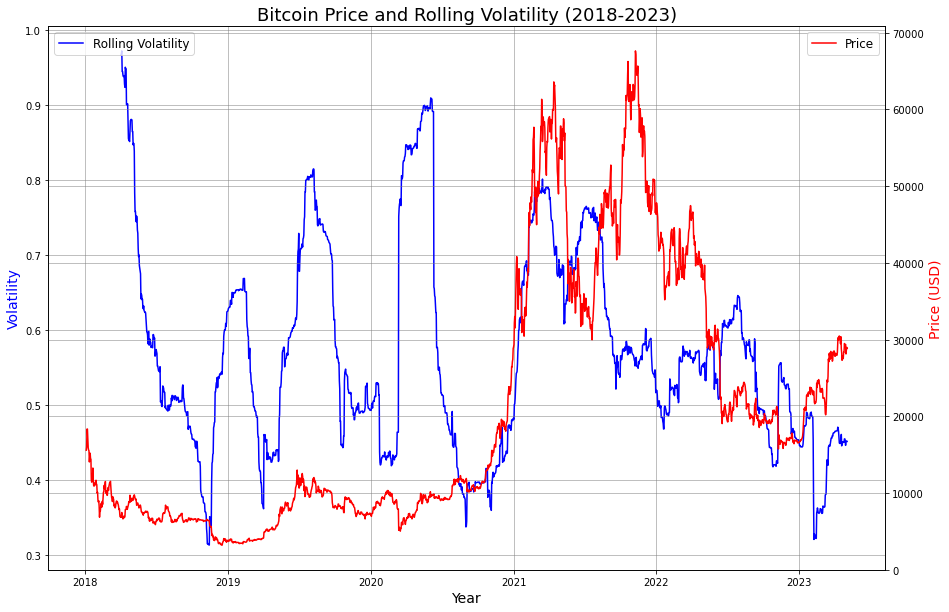

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

# plot the rolling volume on the left y-axis
ax.plot(df.index, df['vol'], color="blue")
ax.set_ylabel("Volatility", color="blue", fontsize=14)


# plot the bitcoin price on the right y-axis
ax2=ax.twinx()
ax2.plot(df.index, df["price"],color="red")
ax2.set_ylabel("Price (USD)",color="red",fontsize=14)


# set x-axis label and tick labels
ax.set_xlabel("Year", fontsize=14)


# add a title to the plot
plt.title("Bitcoin Price and Rolling Volatility (2018-2023)", fontsize=18)

# add grid lines
ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# add a legend to explain which line corresponds to which data
ax.legend(['Rolling Volatility'], loc='upper left', fontsize=12)
ax2.legend(['Price'], loc='upper right', fontsize=12)

plt.show()

